In [1]:
import numpy as np

In [2]:
def random_walk(dims, num_steps):
    step_set = [-1, 0, 1]
    origin = np.zeros((1,dims))
    step_shape = (num_steps, dims)
    # generate random steps from step_set with shape step_shape
    steps = np.random.choice(step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0) # Calculate the path as the cumulative sum
    return path


In [3]:
random_walk(2, 100)

array([[ 0.,  0.],
       [ 0.,  1.],
       [-1.,  2.],
       [-2.,  1.],
       [-3.,  1.],
       [-2.,  1.],
       [-1.,  2.],
       [-2.,  1.],
       [-2.,  2.],
       [-1.,  3.],
       [-1.,  3.],
       [-1.,  3.],
       [ 0.,  4.],
       [-1.,  4.],
       [-2.,  3.],
       [-2.,  3.],
       [-1.,  3.],
       [-2.,  4.],
       [-3.,  5.],
       [-3.,  4.],
       [-4.,  3.],
       [-3.,  3.],
       [-2.,  4.],
       [-1.,  4.],
       [ 0.,  3.],
       [ 1.,  3.],
       [ 0.,  2.],
       [ 1.,  1.],
       [ 0.,  0.],
       [ 1., -1.],
       [ 2.,  0.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 3.,  2.],
       [ 4.,  3.],
       [ 4.,  2.],
       [ 3.,  3.],
       [ 2.,  4.],
       [ 3.,  3.],
       [ 4.,  2.],
       [ 4.,  2.],
       [ 4.,  3.],
       [ 4.,  2.],
       [ 4.,  1.],
       [ 5.,  2.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 5.,  2.],
       [ 4.,  1.],
       [ 3.,  2.],
       [ 4.,

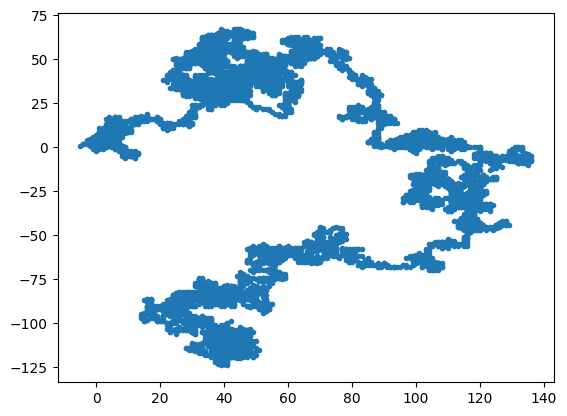

In [32]:
import matplotlib.pyplot as plt


res = random_walk(2, 10000)
plt.figure()
plt.plot(res[:,0], res[:, 1], ".-")

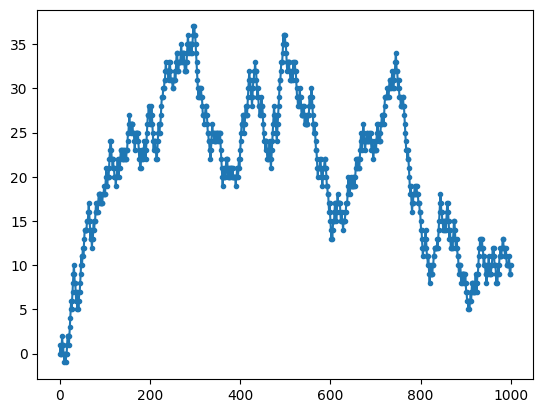

In [33]:
res = random_walk(1, 1000)
plt.figure()
plt.plot(res[:], ".-")

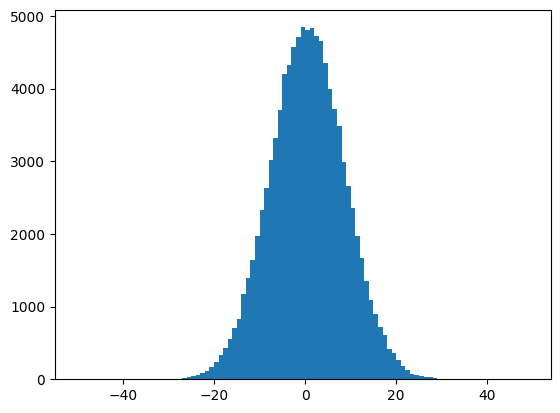

In [6]:
endpoints = []
for _ in range(100000):
    endpoints.append(random_walk(1, 100)[-1].item())
_ = plt.hist(endpoints, range(-50,50))

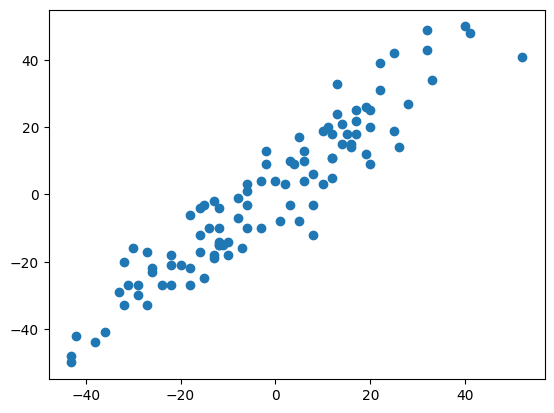

In [49]:
refpoints = []
endpoints = []
for _ in range(100):
    walk = random_walk(1, 1000)
    refpoints.append(walk[900].item())
    endpoints.append(walk[-1].item())
plt.plot(refpoints, endpoints, "o")

In [12]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

In [125]:
means = []
variances = []
N=100
for n in range(1000):
    sample = np.random.normal(4, 5, size=N)
    #plt.hist(sample, np.arange(-10, 15, .5))
    #x = np.arange(-10, 15, .5)
    #plt.plot(x, gaussian(x, 4, 5)*50000)
    means.append(1/N*sample.sum())
    variances.append(1/(N)*((sample-means[-1])**2).sum())

print(np.array(means).mean())
print(np.array(variances).mean())

3.9917962515585685
24.80112061376604


In [167]:
def doniach_sunjic(x, xc, w, a):
    res = w**(1-a)/np.cos(np.pi*a/2)*(np.cos(np.pi*a/2+(1-a)*np.arctan((x-xc)/w))/((x-xc)**2+w**2)**((1-a)/2))
    return res/res.sum()/(x[1]-x[0])


In [195]:
def mean(x, y):
    return (x*y).sum()/y.sum()

def skewness(x, y):
    m = mean(x, y)
    return (y*(x-m)**3).sum()/y.sum()*len(y)/(len(y)-1)/np.sqrt(variance(x, y))**3

def variance(x, y):
    m = mean(x, y)
    return (y*(x-m)**2).sum()/y.sum()*len(y)/(len(y)-1)

def excess(x, y):
    m = mean(x, y)
    return (y*(x-m)**4).sum()/y.sum()*len(y)/(len(y)-1)/np.sqrt(variance(x, y))**4-3

0.9805662910435059
13.64113498479803
-0.07251409461096882
15.775134756510681


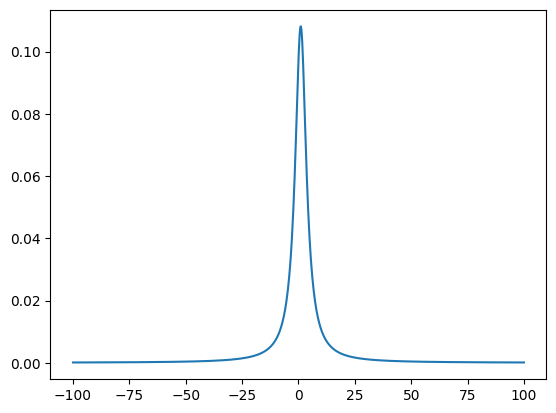

In [197]:
x=np.linspace(-100,100,1000)
y = doniach_sunjic(x, 1, 3, 0.0)
plt.plot(x, y)
print(mean(x, y))
print(np.sqrt(variance(x, y)))
print(skewness(x, y))
print(excess(x, y))

10.0
3.001501125938321
-3.603859304699541e-16
-0.003000000000001446


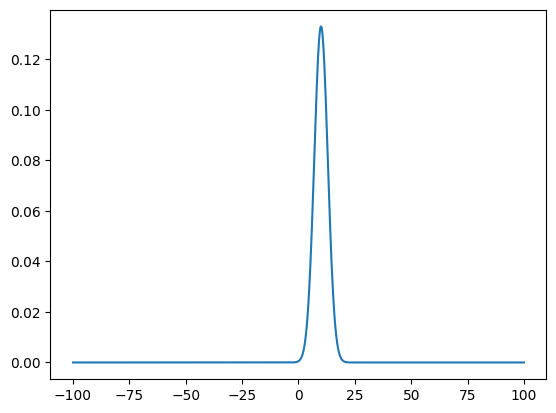

In [200]:
x=np.linspace(-100,100,1000)
y = gaussian(x, 10, 3)
plt.plot(x, y)
print(mean(x, y))
print(np.sqrt(variance(x, y)))
print(skewness(x, y))
print(excess(x, y))

In [201]:
import scipy
def poisson(pos, l):
    return l**pos * np.exp(-l)/scipy.special.factorial(pos)



In [203]:
def binomial(x, N, p):
    return scipy.special.factorial(N)/(scipy.special.factorial(N-x)*scipy.special.factorial(x))*p**x*(1-p)**(N-x)

5.0096662974967465
4.963291366921472
0.4645942868299936
0.19167929007772466


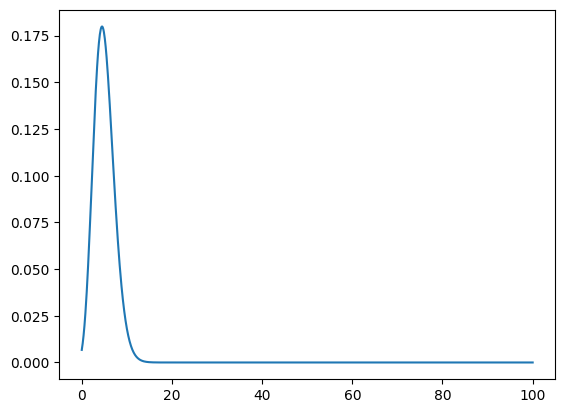

In [202]:
x=np.linspace(0,100,1000)
y = poisson(x, 5)
plt.plot(x, y)
print(mean(x, y))
print(variance(x, y))
print(skewness(x, y))
print(excess(x, y))

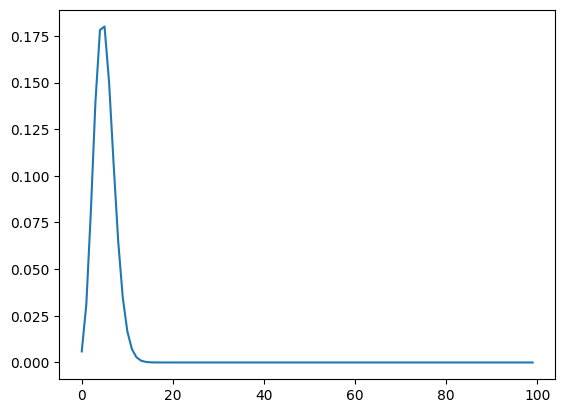

In [233]:
x=np.arange(0,100)
y = binomial(x, 100, .05)
plt.plot(x, y)

In [232]:
from math import factorial
factorial(200)

788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000

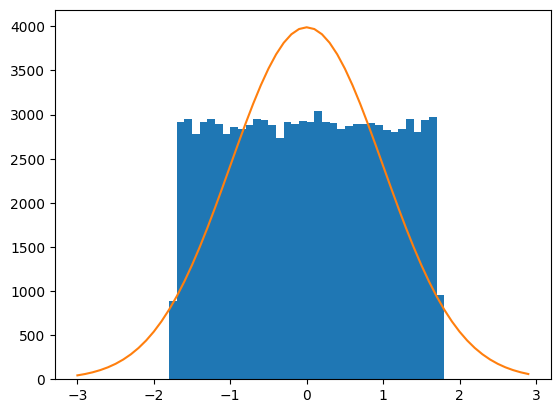

In [56]:
x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
plt.hist(x1, np.arange(-3, 3, .1))
x = np.arange(-3, 3, .1)
plt.plot(x, gaussian(x, 0, 1)*10000)

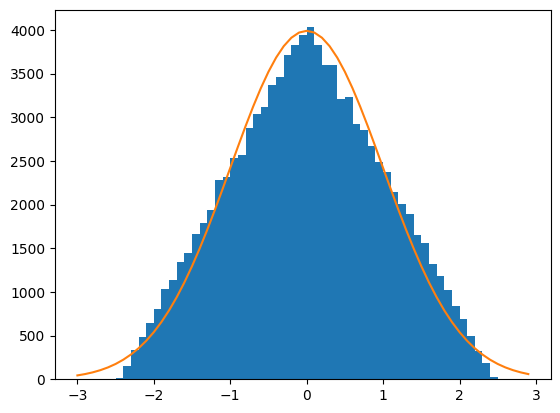

In [29]:
x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
plt.hist((x1+x2)/np.sqrt(2), np.arange(-3, 3, .1))
x = np.arange(-3, 3, .1)
plt.plot(x, gaussian(x, 0, 1)*10000)

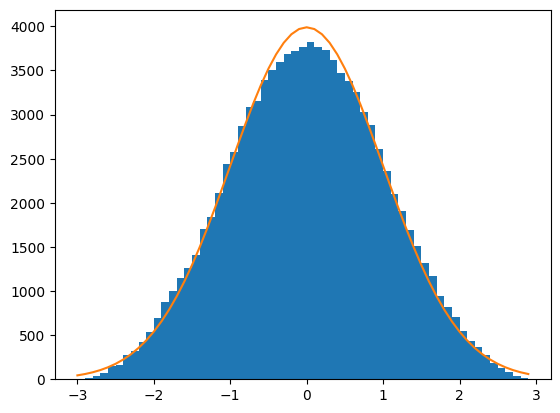

In [30]:
x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x3 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
plt.hist((x1+x2+x3)/np.sqrt(3), np.arange(-3, 3, .1))
x = np.arange(-3, 3, .1)
plt.plot(x, gaussian(x, 0, 1)*10000)

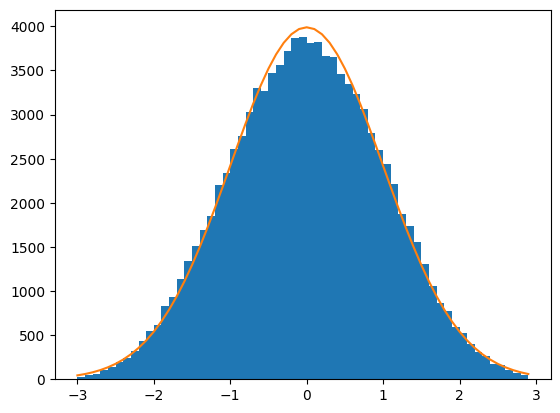

In [31]:
x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x3 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x4 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
plt.hist((x1+x2+x3+x4)/np.sqrt(4), np.arange(-3, 3, .1))
x = np.arange(-3, 3, .1)
plt.plot(x, gaussian(x, 0, 1)*10000)